In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering

In [2]:
data = pd.read_csv('output.csv', error_bad_lines=False)

In [3]:
data.drop_duplicates(inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   artist_name          10000 non-null  object 
 1   title                10000 non-null  object 
 2   artist_location      5623 non-null   object 
 3   release              10000 non-null  object 
 4   hotttness            10000 non-null  float64
 5   familiarity          10000 non-null  float64
 6   danceability         10000 non-null  float64
 7   duration             10000 non-null  float64
 8   energy               10000 non-null  float64
 9   loudness             10000 non-null  float64
 10  year                 10000 non-null  int64  
 11  tempo                10000 non-null  float64
 12  analysis_rate        10000 non-null  int64  
 13  end_of_fade_in       10000 non-null  float64
 14  key                  10000 non-null  int64  
 15  key_confidence       10000 non-null  

In [5]:
data.describe()

,hotttness,familiarity,danceability,duration,energy,loudness,year,tempo,analysis_rate,end_of_fade_in,key,key_confidence,mode,mode_confidence,start_of_fade_out,time_signature,time_signature_conf
count,10000.000000,10000.000000,10000.0,10000.000000,10000.0,10000.000000,10000.00000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.421290,0.607623,0.0,248.906192,0.0,-9.396924,1383.73740,124.699778,22050.0,0.882899,5.343400,0.450784,0.653700,0.479899,239.711663,3.627000,0.521826
std,0.111888,0.126095,0.0,115.172347,0.0,4.867297,923.02456,35.148963,0.0,4.112569,3.603689,0.272951,0.475814,0.190857,112.874480,1.186428,0.369961
min,0.000000,0.000000,0.0,5.537510,0.0,-51.416000,0.00000,0.000000,22050.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.538000,0.000000,0.000000
25%,0.370790,0.531491,0.0,186.435460,0.0,-11.706000,0.00000,98.261500,22050.0,0.000000,2.000000,0.232000,0.000000,0.368000,178.469000,4.000000,0.147000
50%,0.418676,0.608903,0.0,232.763630,0.0,-8.319500,1997.00000,122.445500,22050.0,0.199000,6.000000,0.473000,1.000000,0.492000,223.425000,4.000000,0.563000
75%,0.476394,0.685485,0.0,287.424850,0.0,-5.892000,2005.00000,145.131750,22050.0,0.432000,9.000000,0.653000,1.000000,0.608000,276.963500,4.000000,0.873000
max,1.021256,1.000000,0.0,2569.011790,0.0,0.254000,2011.00000,258.981000,22050.0,350.546000,11.000000,1.000000,1.000000,1.000000,2526.958000,7.000000,1.000000


In [6]:
features = ['hotttness', 'familiarity', 'loudness', 'tempo', 'key', 'mode', 'time_signature', 'duration']
data = data[features]


In [7]:
data.describe()


,hotttness,familiarity,loudness,tempo,key,mode,time_signature,duration
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.421290,0.607623,-9.396924,124.699778,5.343400,0.653700,3.627000,248.906192
std,0.111888,0.126095,4.867297,35.148963,3.603689,0.475814,1.186428,115.172347
min,0.000000,0.000000,-51.416000,0.000000,0.000000,0.000000,0.000000,5.537510
25%,0.370790,0.531491,-11.706000,98.261500,2.000000,0.000000,4.000000,186.435460
50%,0.418676,0.608903,-8.319500,122.445500,6.000000,1.000000,4.000000,232.763630
75%,0.476394,0.685485,-5.892000,145.131750,9.000000,1.000000,4.000000,287.424850
max,1.021256,1.000000,0.254000,258.981000,11.000000,1.000000,7.000000,2569.011790


In [8]:
data.dropna(inplace=True)

In [9]:
# for easier comparison of features in the analysis, scaling is used

scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)

In [10]:
scaled_data = pd.DataFrame(data=data_scaled, index=data.index, columns=data.columns)
scaled_data.describe()

,hotttness,familiarity,loudness,tempo,key,mode,time_signature,duration
count,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.475686e-02,-0.008314,-1.853154e-01,4.809614e-02,-0.093800,-0.346300,-0.373000,0.159844
std,1.059499e+00,0.818830,8.371684e-01,7.499205e-01,0.514813,0.475814,1.186428,1.140440
min,-3.964574e+00,-3.954080,-7.412539e+00,-2.612435e+00,-0.857143,-1.000000,-4.000000,-2.250000
25%,-4.534480e-01,-0.502697,-5.824733e-01,-5.159776e-01,-0.571429,-1.000000,0.000000,-0.458743
50%,-2.628242e-16,0.000000,1.527641e-16,-1.515715e-16,0.000000,0.000000,0.000000,0.000000
75%,5.465520e-01,0.497303,4.175267e-01,4.840224e-01,0.428571,0.000000,0.000000,0.541257
max,5.706021e+00,2.539694,1.474630e+00,2.913053e+00,0.714286,0.000000,3.000000,23.133600


<AxesSubplot:>

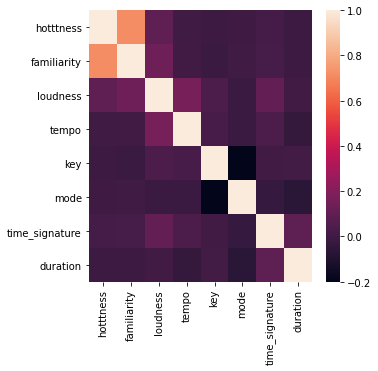

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(scaled_data.corr())

# hotttness and familiarity are highly linearly correlated

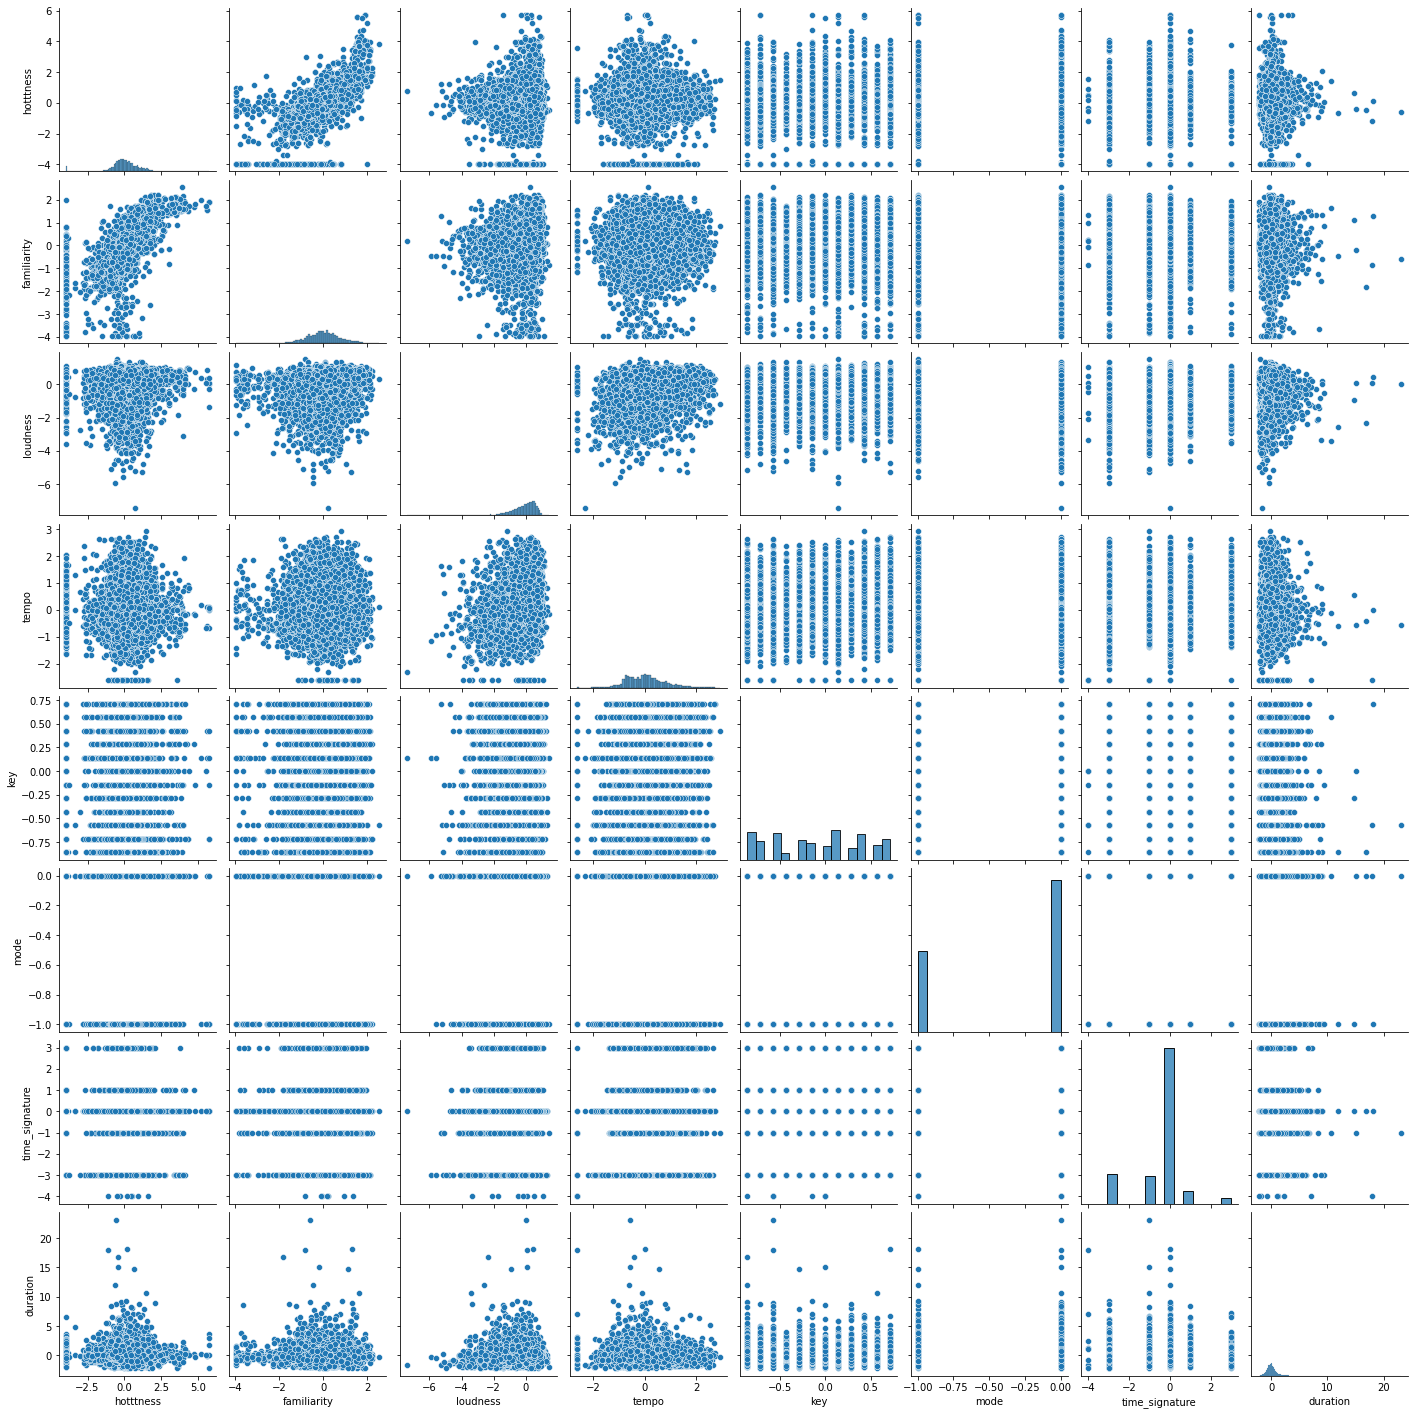

In [12]:
sns.pairplot(scaled_data)